In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thisismetis/sf20_ds18/master/pairs/cereal/cereal.csv?token=ADA5PK3BJILRHDXCCMX4P6266N52S')

In [3]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [26]:
df.groupby('mfr').rating.mean()

mfr
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Q    42.915990
R    41.542997
Name: rating, dtype: float64

Text(0.5, 1.0, 'Average Rating by Manufacturer')

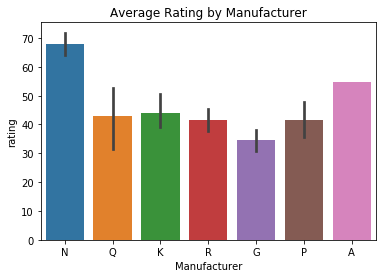

In [28]:
sns.barplot(x=df.mfr,y=df.rating)
plt.xlabel('Manufacturer')
plt.title('Average Rating by Manufacturer')

Text(0.5, 1.0, 'Rating vs. Sugars')

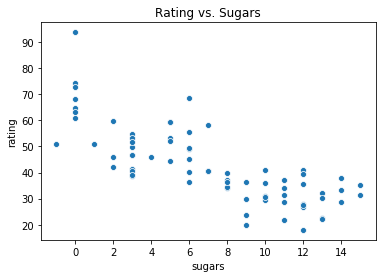

In [66]:
sns.scatterplot(x='sugars', y='rating', data=df)
plt.title('Rating vs. Sugars')

In [70]:
cc_sugar = scipy.stats.pearsonr(x=df.sugars,y=df.rating)
print("The Pearson's Correlation Coefficient for Sugars and Rating : " + str(cc_sugar[0]))

The Pearson's Correlation Coefficient for Sugars and Rating : -0.7596746584301078


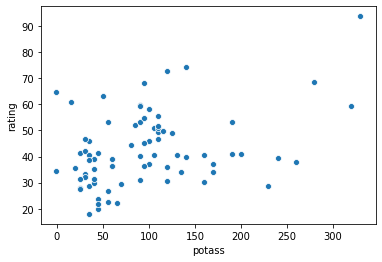

In [77]:
sns.scatterplot(x=df.potass,y=df.rating)

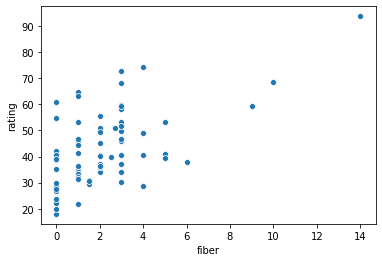

In [78]:
sns.scatterplot(x=df.fiber,y=df.rating)

Text(0.5, 1.0, 'Rating vs. Calories')

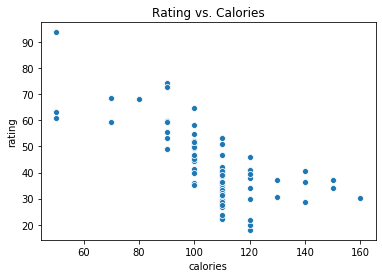

In [37]:
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Rating vs. Calories')

In [71]:
cc_cal = scipy.stats.pearsonr(x=df.calories,y=df.rating)
print("The Pearson's Correlation Coefficient for Calories and Rating : " + str(cc_cal[0]))

The Pearson's Correlation Coefficient for Calories and Rating : -0.6893760311652586


Text(0.5, 1.0, 'Rating vs. Vitamins')

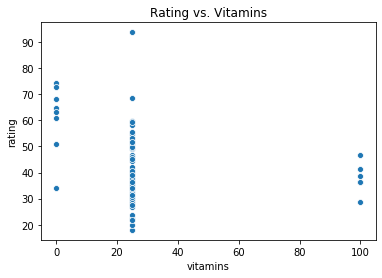

In [49]:
sns.scatterplot(x='vitamins', y='rating', data=df)
plt.title('Rating vs. Vitamins')

Text(0.5, 1.0, 'Ratings Distribution')

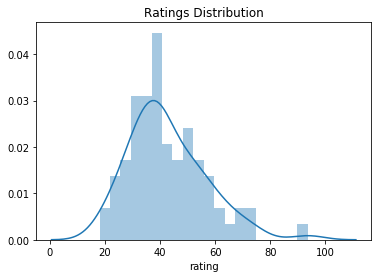

In [38]:
sns.distplot( df['rating'], bins=20 )
plt.title('Ratings Distribution')

In [40]:
shelf_1 = df[df.shelf == 1]
shelf_2 = df[df.shelf == 2]
shelf_3 = df[df.shelf == 3]

Text(0.5, 1.0, 'Ratings Distributions by Shelf')

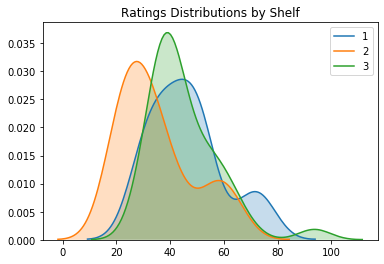

In [48]:
sns.kdeplot(shelf_1.rating, shade=True, label='1')
sns.kdeplot(shelf_2.rating, shade=True, label='2')
sns.kdeplot(shelf_3.rating, shade=True, label='3')
plt.title('Ratings Distributions by Shelf')

In [51]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

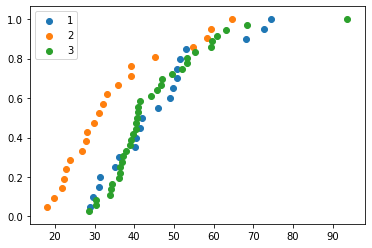

In [58]:
x,y = ecdf(shelf_1.rating)
plt.scatter(x=x, y=y)
x,y = ecdf(shelf_2.rating)
plt.scatter(x=x, y=y)
x,y = ecdf(shelf_3.rating)
plt.scatter(x=x, y=y)
plt.legend(['1','2','3'])

In [59]:
df.cups.value_counts()

1.00    30
0.75    16
0.67    13
0.50     7
0.33     3
0.88     2
0.80     1
1.13     1
1.33     1
1.50     1
0.25     1
1.25     1
Name: cups, dtype: int64

Text(0.5, 0, 'Cups')

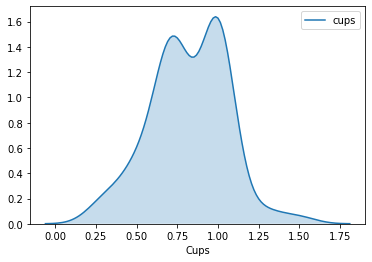

In [61]:
sns.kdeplot(df.cups, shade=True)
plt.xlabel('Cups')

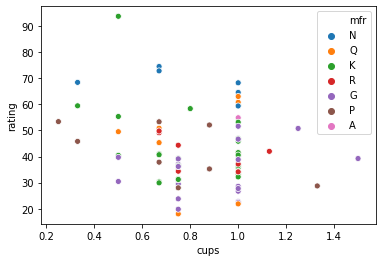

In [63]:
sns.scatterplot(x=df.cups,y=df.rating,hue=df.mfr)

In [72]:
df.vitamins.value_counts()

25     63
0       8
100     6
Name: vitamins, dtype: int64

In [73]:
high_vitamin = df[df.vitamins == 100]

In [75]:
high_vitamin.rating.mean()

38.098351666666666

In [76]:
df.rating.mean()

42.66570498701299

In [79]:
df.sodium.std()

83.83229524009317